# Librerias 

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Visualizacion de datos

In [9]:
import numpy as np

In [10]:
dataiterator = ds.as_numpy_iterator()

In [15]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

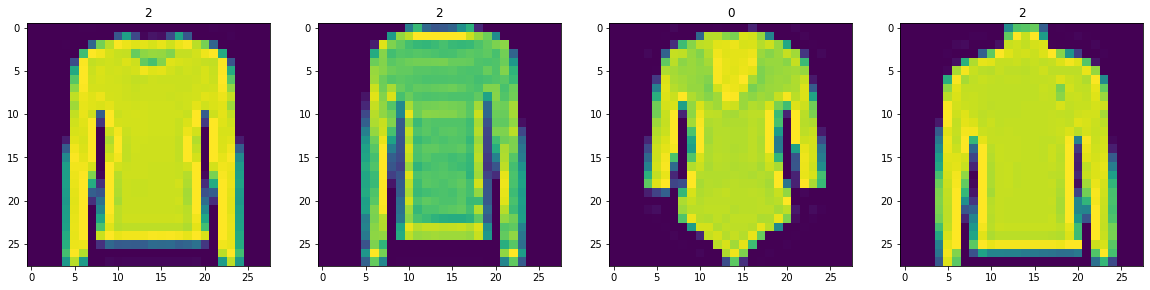

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])    

In [19]:
def scale_images(data):
    image = data['image']
    return image/255

In [20]:
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

# Neural Network

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [27]:
def build_generator():
    model = Sequential()
    
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [28]:
generator = build_generator()

In [29]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [30]:
img = generator.predict(np.random.randn(4,128,1))
img

array([[[[0.52198905],
         [0.5116014 ],
         [0.5113948 ],
         ...,
         [0.5040231 ],
         [0.5017586 ],
         [0.50100976]],

        [[0.52082366],
         [0.5108356 ],
         [0.5068082 ],
         ...,
         [0.5076459 ],
         [0.50143945],
         [0.49938112]],

        [[0.5178509 ],
         [0.51502657],
         [0.50798845],
         ...,
         [0.50734854],
         [0.49860024],
         [0.49732396]],

        ...,

        [[0.50205326],
         [0.5016662 ],
         [0.4892893 ],
         ...,
         [0.4994287 ],
         [0.49724638],
         [0.5001658 ]],

        [[0.5022301 ],
         [0.500792  ],
         [0.49815178],
         ...,
         [0.5007508 ],
         [0.49936447],
         [0.50265193]],

        [[0.4973533 ],
         [0.49585634],
         [0.4972723 ],
         ...,
         [0.50183463],
         [0.50112677],
         [0.50115997]]],


       [[[0.5165619 ],
         [0.5122086 ],
         [0.50

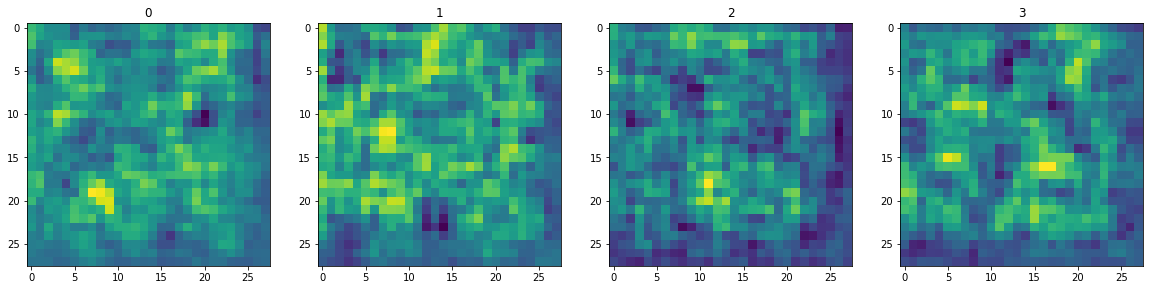

In [31]:
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)    

In [32]:
def build_discriminator():
    model = Sequential()
    
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    return model

In [35]:
discriminator = build_discriminator()

In [36]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________
